In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (10, 6)

| Variable | Description                                                                                            |
|----------|--------------------------------------------------------------------------------------------------------|
| Bad      | 1 = customer defaulted on the loan or is seriously delinquent 0 = customer is current on loan payments |
| CLAge    | Age of oldest credit line in months                                                                    |
| CLNo     | Number of credit lines                                                                                 |
| DebtInc  | Debt-to-income ratio                                                                                   |
| Delinq   | Number of delinquent credit lines                                                                      |
| Derog    | Number of major derogatory reports                                                                     |
| Job      | Occupational category                                                                                  |
| Loan     | Requested loan amount                                                                                  |
| MortDue  | Amount due on existing mortgage                                                                        |
| nInq     | Number of recent credit inquiries                                                                      |
| Reason   | DebtCon = debt consolidation HomeImp = home improvement                                                |
| Value    | Value of current property                                                                              |
| YoJ      | Years at present job                                                                                   |

Style görünümü için [nbviewer](https://nbviewer.jupyter.org/github/Kodluyoruz-Ankara-Veri-Bilimi/muratacikgoz/blob/master/2_hmelq.ipynb) üzerinden inceleyin!

In [2]:
df = pd.read_csv('hmelq.csv')

In [3]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.000,108355.000,HomeImp,NaN,28.000,0.000,0.000,139.140,0.000,14.000,34.042
1,0,12600,103960.000,127384.000,DebtCon,NaN,2.000,0.000,0.000,129.020,0.000,25.000,34.479
2,0,18000,46865.000,61266.000,DebtCon,NaN,5.000,0.000,0.000,102.590,2.000,9.000,26.354


In [4]:
aio.describe(df)

,dtype,count,mean,std,min,median,max,dupe,null,zero,unique,freq,top,upout,lowout
bad,int64,3576,0.199,0.400,0,0.000,1,0,0,80.062%,2,2863,0,19.938%,0.000%
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3262,74013.908,44016.834,2619.000,65858.000,399550.000,0,314,0.000%,3095,6,50000.000,3.747%,0.000%
value,float64,3512,101076.923,54865.275,8800.000,89183.000,850000.000,0,64,0.000%,3302,9,80000.000,5.537%,0.000%
reason,object,3429,NaN,NaN,NaN,NaN,NaN,0,147,0.000%,2,2371,DebtCon,NaN,NaN
job,object,3409,NaN,NaN,NaN,NaN,NaN,0,167,0.000%,6,1431,Other,NaN,NaN
yoj,float64,3264,8.833,7.568,0.000,7.000,41.000,0,312,6.907%,86,247,0.000,1.370%,0.000%
derog,float64,3149,0.262,0.865,0.000,0.000,10.000,0,427,75.671%,11,2706,0.000,12.388%,0.000%
delinq,float64,3225,0.433,1.099,0.000,0.000,15.000,0,351,70.386%,12,2517,0.000,19.799%,0.000%
clage,float64,3397,179.833,87.066,0.490,173.640,1168.230,0,179,0.000%,3050,7,102.500,0.951%,0.000%


### Null Grafiği

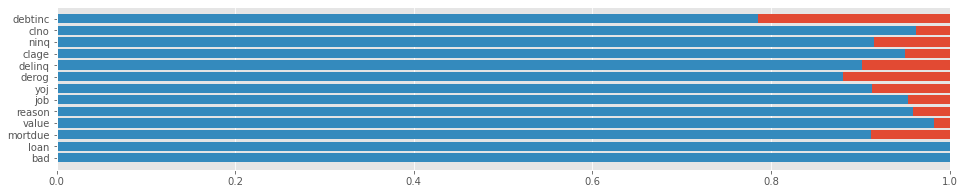

In [5]:
plt.figure(figsize=(16,3))
aio.nullbar(df)

- En çok null değer debtinc kolonunda görünüyor, sayısal değerlere oranla object null değerler azınlıkta kalıyor.
- Hedef değişkeninde ve istenen loan miktarında null değer bulunmamaktadır.

### Uniq Değerler

In [6]:
aio.unique(df)

bad : [0 1]
--------------------------------------------------------------------------------
reason : ['HomeImp' 'DebtCon' nan]
--------------------------------------------------------------------------------
job : [nan 'Mgr' 'Office' 'Other' 'ProfEx' 'Sales' 'Self']
--------------------------------------------------------------------------------
yoj : [28.    2.    5.   19.   17.    4.   26.   16.   14.   25.    3.    8.
  6.   10.   15.   18.    7.     nan 27.    3.8   8.5   0.    1.   13.
 11.    9.   21.   12.   20.   29.   22.   23.   30.   24.    2.5   9.9
 31.    0.8   1.5   3.5   0.5   5.5   0.2   0.4  36.   35.    0.1   7.5
  1.9   1.3   0.9  14.4  28.5  10.5   0.3  22.8  12.6   2.3   4.5  33.
  0.6   9.3   3.9   6.6  17.6   1.6  41.    7.2   0.25  2.6  34.    5.6
  9.2   9.5   9.8   6.5   3.2   4.6   2.9  24.5  19.5  17.5   4.3   0.7
  7.4   1.8   2.2 ]
--------------------------------------------------------------------------------
derog : [ 0.  1. nan  2.  3.  4.  6.  5.  7

### Korelasyon

In [7]:
df.corr().style.background_gradient()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


- En yüksek korele mortdue ve value arasında gözlemleniyor.
- Genel tabloya bakılırsa, aralarındaki ilişki oldukça düşük görünüyor.
- Bad kolonu incelendiğinde, müşterinin kredi alabilmesi en çok delinq ve en düşük loan değerine bağlı görünüyor.

In [8]:
dfCopy = df.copy()

In [9]:
dfCopy['reason'].fillna('DebtCon', inplace = True)
dfCopy['job'].fillna('Other', inplace = True)
dfCopy['derog'].fillna(0, inplace = True)
dfCopy['delinq'].fillna(0, inplace = True)

for col in dfCopy.isnull().sum()[dfCopy.isnull().sum() != 0].index:
    jr_mean = pd.DataFrame(dfCopy.groupby(['job','reason'])[col].mean())
    for j in dfCopy.job.unique():
        for i in dfCopy.reason.unique():
            dfCopy.loc[dfCopy[col].isna() == True, col] = jr_mean.xs((j,i))[0]
            
dfCopy.yoj = dfCopy.yoj.round(1)
dfCopy.clno = dfCopy.clno.round(0)
dfCopy.ninq = dfCopy.ninq.round(0)

In [10]:
aio.describe(dfCopy)

,dtype,count,mean,std,min,median,max,dupe,null,zero,unique,freq,top,upout,lowout
bad,int64,3576,0.199,0.400,0,0.000,1,0,0,80.062%,2,2863,0,19.938%,0.000%
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3576,72390.709,42363.753,2619.000,62101.500,399550.000,0,0,0.000%,3096,314,55528.045,5.257%,0.000%
value,float64,3576,100646.022,54465.598,8800.000,88322.500,850000.000,0,0,0.000%,3303,64,77000.332,5.677%,0.000%
reason,object,3576,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,2518,DebtCon,NaN,NaN
job,object,3576,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,6,1598,Other,NaN,NaN
yoj,float64,3576,8.917,7.235,0.000,8.000,41.000,0,0,6.907%,85,313,9.800,3.440%,0.000%
derog,float64,3576,0.230,0.816,0.000,0.000,10.000,0,0,87.612%,11,3133,0.000,12.388%,0.000%
delinq,float64,3576,0.390,1.052,0.000,0.000,15.000,0,0,80.201%,12,2868,0.000,19.799%,0.000%
clage,float64,3576,179.796,84.859,0.490,177.855,1168.230,0,0,0.000%,3051,179,179.109,1.230%,0.000%


### Grafikler

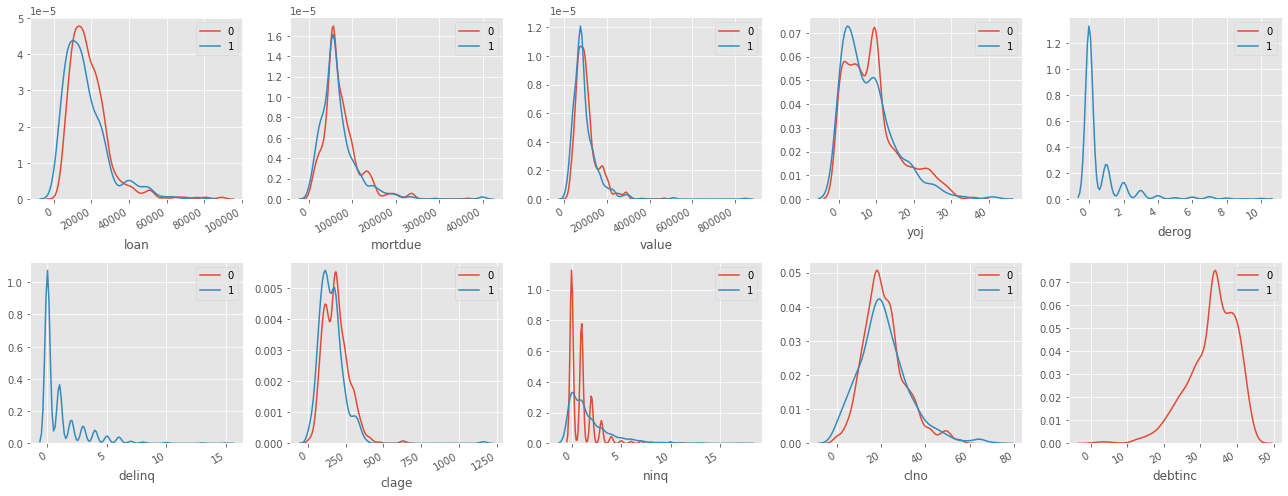

In [11]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns[1:], 1):
    plt.subplot(2, 5, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 0],label=0, hist=False)
    sns.distplot(dfCopy[col][dfCopy.bad == 1],label=1, hist=False)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

- Bad olan müşterilerin raporları ve geçiktirilmiş borçları olduğu gözlemlendi.
- Borç/gelir oranı kredi alabiliritesi olan müşteriler için dağılım sergilerken, 1 olanlar için dağılım gözlemlenmiyor.

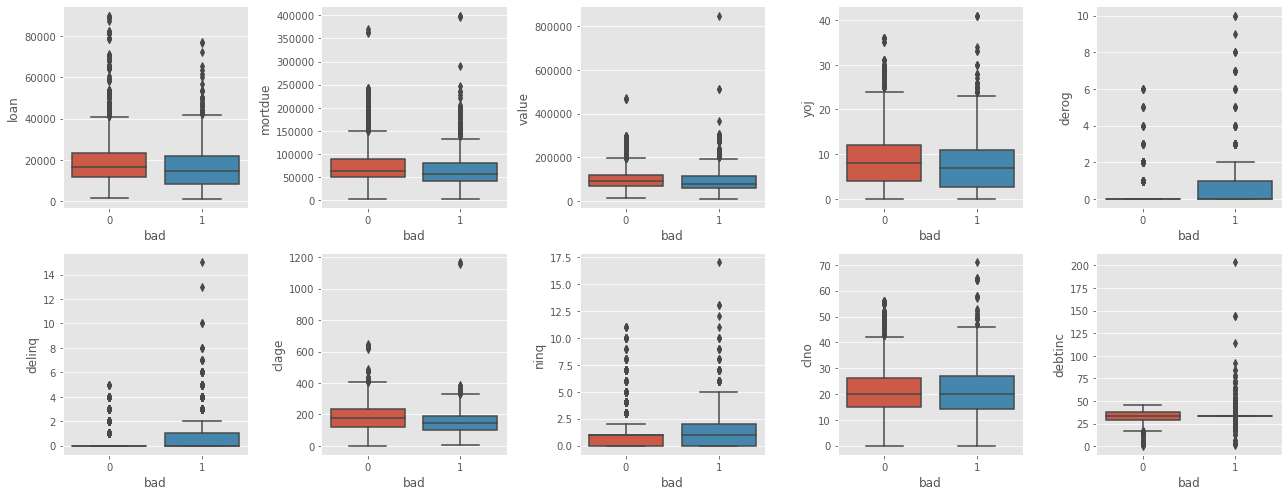

In [12]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns[1:], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(dfCopy.bad, dfCopy[col])
    plt.tight_layout()

- Yoğun olarak aykırı değer gözlenmektedir.
- Hedef değişkene göre clno benzer varyansa sahiptir.

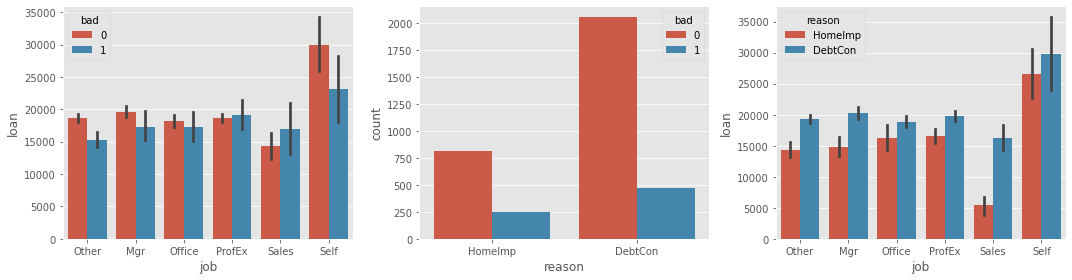

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.barplot(x='job', y='loan', hue='bad', data=dfCopy, ax=ax[0])
sns.countplot('reason', hue='bad', data=dfCopy, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=dfCopy, ax=ax[2])
plt.tight_layout()

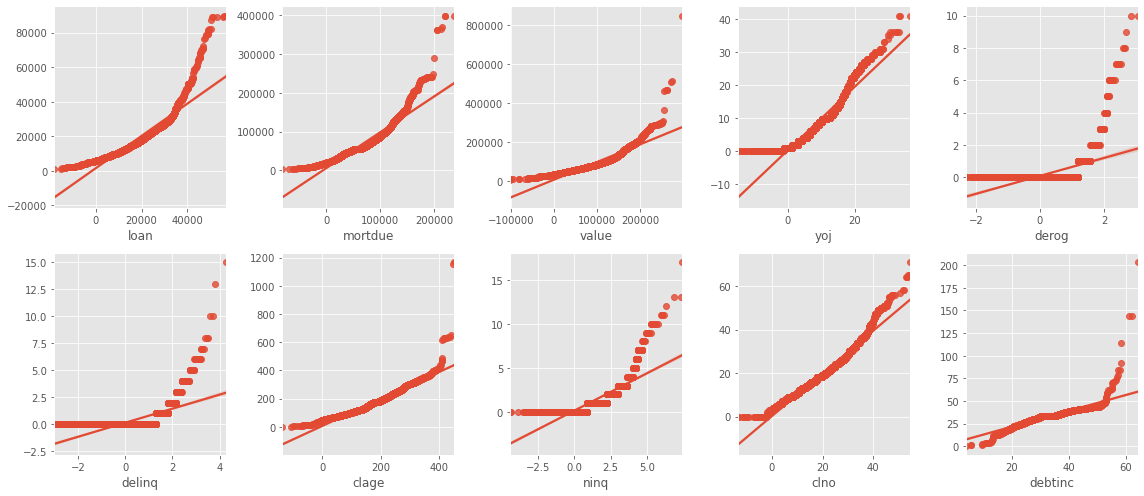

In [14]:
plt.figure(figsize=(16, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns[1:], 1):
    plt.subplot(2, 5, i)
    randNorm = np.random.normal(np.mean(dfCopy[col]), np.std(dfCopy[col]), len(dfCopy[col]))
    sns.regplot(np.sort(randNorm), np.sort(dfCopy[col]))
    plt.xlabel(f'{col}')
    #plt.yticks(rotation=60, ha='right')
    plt.tight_layout()

- Normale en yakın görüş, clno değerlerinde, ama p-value incelemek gerekir.

### p-Value

In [15]:
from scipy.stats import levene

midx = pd.MultiIndex.from_product([['shapiro'], ['p', '0', '1']])
idx = pd.IndexSlice
p_value = pd.DataFrame(columns=midx)
for col in dfCopy.columns[1:]:
    if dfCopy[col].dtypes != object:
        p_value.loc[col,idx['shapiro','p']] = (stats.shapiro(dfCopy[col])[1])
        p_value.loc[col,idx['shapiro','0']] = (stats.shapiro(dfCopy[col][dfCopy.bad == 0])[1])
        p_value.loc[col,idx['shapiro','1']] = (stats.shapiro(dfCopy[col][dfCopy.bad == 1])[1])
        p_value.loc[col,'kstest'] = (stats.ks_2samp(dfCopy[col][dfCopy.bad == 0], dfCopy[col][dfCopy.bad == 1])[1])
        p_value.loc[col,'levene'] = (levene(dfCopy[col][dfCopy.bad == 0], dfCopy[col][dfCopy.bad == 1])[1])
        
        if (levene(dfCopy[col][dfCopy.bad == 0], dfCopy[col][dfCopy.bad == 1])[1]) > 0.05:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 0], dfCopy[col][dfCopy.bad == 1],equal_var=True)[1])
        else:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 0], dfCopy[col][dfCopy.bad == 1],equal_var=False)[1])

In [16]:
def color_negative(val):
    color = 'red' if val > 0.05 else 'black'
    return 'color: %s' % color
p_value.style.applymap(color_negative)

Hedef değişkene göre;
- Shapiro testi için hiçbiri normal dağılım sergilemiyor.
- KS testi için hiçbiri normal dağılım sergilemiyor, ama clno daha yüksek gözlemlendi.
- Levene testi için kırmızı olanlar aynı varyansa sahip değerlerdir.
- Bağımsız ttesti için clno ile anlamlı bir farklılık yoktur, kredi onayı diğer değerler için anlamlı-belirleyici bulunuyor.

In [17]:
def ttest_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dftt = pd.DataFrame()
    for idx in dfNum.columns:
        for col in dfNum.columns:
            stat, p = stats.ttest_ind(dfNum[idx][dfCopy.bad == 0], dfNum[col][dfCopy.bad == 1],equal_var=False)
            dftt.loc[idx+str('_0'), col+str('_1')] = p
    return dftt
ttest_value(dfCopy).style.background_gradient()

,bad_1,loan_1,mortdue_1,value_1,yoj_1,derog_1,delinq_1,clage_1,ninq_1,clno_1,debtinc_1
bad_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
loan_0,0.000000,0.000047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mortdue_0,0.000000,0.000000,0.001987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_0,0.000000,0.000000,0.000000,0.000786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yoj_0,0.000000,0.000000,0.000000,0.000000,0.001657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
derog_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
delinq_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clage_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ninq_0,0.280635,0.000000,0.000000,0.000000,0.000000,0.000000,0.324061,0.000000,0.000000,0.000000,0.000000
clno_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.605163,0.000000


In [18]:
from scipy.stats import levene

def levene_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dflev = pd.DataFrame()
    for idx in dfNum.columns:
        for col in dfNum.columns:
            stat, p = levene(dfNum[idx][dfCopy.bad == 0], dfNum[col][dfCopy.bad == 1])
            dflev.loc[idx+str('_0'), col+str('_1')] = p
    return dflev
levene_value(dfCopy).style.background_gradient()

,bad_1,loan_1,mortdue_1,value_1,yoj_1,derog_1,delinq_1,clage_1,ninq_1,clno_1,debtinc_1
bad_0,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
loan_0,0.000000,0.011830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mortdue_0,0.000000,0.000000,0.931290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_0,0.000000,0.000000,0.000001,0.594313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yoj_0,0.000000,0.000000,0.000000,0.000000,0.567084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
derog_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
delinq_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clage_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.252185,0.000000,0.000000,0.000000
ninq_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001140,0.000000,0.000000,0.000000,0.000000
clno_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000
